# This notebook aims to execute automated methodological steps for research reproduction purposes. For this, the computational routine main code was divided into two parts, the first containing the "semantic search" and the next part containing the cosine similarity.

---



# FIRST STEP - SEMANTIC SEARCH

________________________________________________________________________________

 To start, we will need to install and import OpenAI and input an API Key. To do that, we will need to login in https://openai.com/ and go to "View API Keys" to generate a key to input. After, wee need to install all dependencies and the correct version of the packages as showing below.

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.5 MB/s eta 0:00:00


In [ ]:
!pip install cohere

In [ ]:
!pip install openai

In [ ]:
!pip install openai==0.28.1

In [ ]:
from openai.embeddings_utils import get_embedding
import openai
import pandas as pd
import os
import numpy as np
from getpass import getpass

openai.api_key = getpass()

··········


Let's start with a simple .csv file that contains the definitions of geographical classes. After creating the file, or download, upload it to Google Colab files. Once the file is uploaded, read it into a pandas data frame.

In [ ]:
df = pd.read_csv('words.csv')
print(df)

                                                 TEXT  Unnamed: 1
0   All land that is not classified as forest or o...         NaN
1   Campo e uma forma particular de ocorrencia (no...         NaN
2   Entende como areas campestres as diferentes ca...         NaN
3   Areas de relevo plano ou suave ondulado recobe...         NaN
4   Open areas covered by homogeneous grasses with...         NaN
..                                                ...         ...
80  As dunas sao as areas compostas somente por ar...         NaN
81  Areas of rock or soil containing little or no ...         NaN
82  Rocha e uma formacao natural de minerais agreg...         NaN
83  Estas areas referem se tanto a ambientes natur...         NaN
84  Os afloramentos rochosos sao aquelas areas que...         NaN

[85 rows x 2 columns]


Transform the data into Embenddinigs and save the vector coordinates into a "word_embeddings.csv" file, showed as a output with respectives embenddings.

In [ ]:
from openai.embeddings_utils import get_embedding

df['embedding'] = df['TEXT'].apply(lambda x: get_embedding(x, engine='text-embedding-ada-002'))
df.to_csv('word_embeddings.csv')

In [ ]:
df = pd.read_csv('word_embeddings.csv')
df['embedding'] = df['embedding'].apply(eval).apply(np.array)
df

Unnamed: 0                                               TEXT  Unnamed: 1  \
0            0  All land that is not classified as forest or o...         NaN   
1            1  Campo e uma forma particular de ocorrencia (no...         NaN   
2            2  Entende como areas campestres as diferentes ca...         NaN   
3            3  Areas de relevo plano ou suave ondulado recobe...         NaN   
4            4  Open areas covered by homogeneous grasses with...         NaN   
..         ...                                                ...         ...   
80          80  As dunas sao as areas compostas somente por ar...         NaN   
81          81  Areas of rock or soil containing little or no ...         NaN   
82          82  Rocha e uma formacao natural de minerais agreg...         NaN   
83          83  Estas areas referem se tanto a ambientes natur...         NaN   
84          84  Os afloramentos rochosos sao aquelas areas que...         NaN   

                                            embedding  
0   [0.005468650255352259, -0.0038749114610254765,...  
1   [0.01135140098631382, -0.0013049260014668107, ...  
2   [0.006574807222932577, 0.00865225214511156, 0....  
3   [-0.004568793810904026, -0.006202402990311384,...  
4   [0.007864383980631828, 0.0026618416886776686, ...  
..                                                ...  
80  [-0.0017823720118030906, 0.00835669506341219, ...  
81  [0.003242536447942257, 0.002935875440016389, 0...  
82  [-0.010559947229921818, 0.0050237588584423065,...  
83  [0.008527514524757862, -0.006308290176093578, ...  
84  [-0.004323268309235573, -0.008933056145906448,...  

[85 rows x 4 columns]

In this part, we chose the search term to input and transform it in Embenddinigs.
In this case, we chose to use the Brazilian topographic map nomenclature classes as input.

In [ ]:
search_term = input('Enter a search term: ')

Enter a search term: forerst


In [ ]:
# semantic search
search_term_vector = get_embedding(search_term, engine="text-embedding-ada-002")
search_term_vector

[-0.0014630149817094207,
 -0.018657540902495384,
 -0.03234342113137245,
 -0.016668876633048058,
 0.008251577615737915,
 0.025272613391280174,
 -0.02916708216071129,
 -0.009031851775944233,
 -0.008907560259103775,
 0.003507783403620124,
 0.01825704611837864,
 0.038281794637441635,
 -0.011724835261702538,
 -0.0005739852203987539,
 0.0005312600405886769,
 0.008748743683099747,
 0.0392761267721653,
 -0.00694651622325182,
 0.0170831810683012,
 -0.012525824829936028,
 -0.01421066652983427,
 0.019955696538090706,
 0.005814081989228725,
 -0.00589003786444664,
 -0.02538309432566166,
 -0.02538309432566166,
 0.00532382121309638,
 -0.0283660925924778,
 0.01564692333340645,
 -0.004595334641635418,
 0.0008825562545098364,
 -0.009694740176200867,
 -0.023311568424105644,
 -0.02632218599319458,
 -0.024885928258299828,
 -0.004094715695828199,
 0.004823202267289162,
 -0.0363483689725399,
 0.012063184753060341,
 -0.020742876455187798,
 0.004149956628680229,
 0.011911273002624512,
 0.007039734628051519,
 -

After that, calculate the cosine similarity between the search term and all the data input

In [ ]:
from openai.embeddings_utils import cosine_similarity

df["similarities"] = df['embedding'].apply(lambda x: cosine_similarity(x, search_term_vector))

df

Unnamed: 0                                               TEXT  Unnamed: 1  \
0            0  All land that is not classified as forest or o...         NaN   
1            1  Campo e uma forma particular de ocorrencia (no...         NaN   
2            2  Entende como areas campestres as diferentes ca...         NaN   
3            3  Areas de relevo plano ou suave ondulado recobe...         NaN   
4            4  Open areas covered by homogeneous grasses with...         NaN   
..         ...                                                ...         ...   
80          80  As dunas sao as areas compostas somente por ar...         NaN   
81          81  Areas of rock or soil containing little or no ...         NaN   
82          82  Rocha e uma formacao natural de minerais agreg...         NaN   
83          83  Estas areas referem se tanto a ambientes natur...         NaN   
84          84  Os afloramentos rochosos sao aquelas areas que...         NaN   

                                            embedding  similarities  
0   [0.005468650255352259, -0.0038749114610254765,...      0.732879  
1   [0.01135140098631382, -0.0013049260014668107, ...      0.720590  
2   [0.006574807222932577, 0.00865225214511156, 0....      0.738843  
3   [-0.004568793810904026, -0.006202402990311384,...      0.732883  
4   [0.007864383980631828, 0.0026618416886776686, ...      0.724689  
..                                                ...           ...  
80  [-0.0017823720118030906, 0.00835669506341219, ...      0.736266  
81  [0.003242536447942257, 0.002935875440016389, 0...      0.721061  
82  [-0.010559947229921818, 0.0050237588584423065,...      0.707813  
83  [0.008527514524757862, -0.006308290176093578, ...      0.717203  
84  [-0.004323268309235573, -0.008933056145906448,...      0.719562  

[85 rows x 5 columns]

In this step, the responses are showed by ascending values

In [ ]:
df.sort_values("similarities", ascending=False).head(20)

Unnamed: 0                                               TEXT  Unnamed: 1  \
37          37  Manguezal arboreo Formacao Pioneira com influe...         NaN   
40          40  Manguezal arboreo Formacao Pioneira com influe...         NaN   
55          55                            Mistura de terra e agua         NaN   
32          32  Manguezal arboreo (Formacao Pioneira com influ...         NaN   
60          60  Binomio criado por Trochain (1955) para design...         NaN   
19          19  Cereals grasses and crops planted/planted by h...         NaN   
65          65  Savana Arborizada (Campo Cerrado) Savana Parqu...         NaN   
68          68  caracterizam por um estrato predominantemente ...         NaN   
71          71  Reflorestamento e uma area onde foi implantada...         NaN   
75          75  Se caracterizam por um estrato predominantemen...         NaN   
70          70  Inclui terras de cultivo itinerantes abandonad...         NaN   
77          77  Brejo ou pantano e uma formacao pioneira de in...         NaN   
2            2  Entende como areas campestres as diferentes ca...         NaN   
49          49  Nos pantanos o genero cosmopolita Typha fica c...         NaN   
6            6  entende se como areas campestres as diferentes...         NaN   
80          80  As dunas sao as areas compostas somente por ar...         NaN   
14          14  entende se como areas campestres as diferentes...         NaN   
43          43  considera se como florestais as formacoes arbo...         NaN   
20          20  Especie vegetal cultivada com extracao para be...         NaN   
74          74  Vegetacao de restinga e uma formacao pioneira ...         NaN   

                                            embedding  similarities  
37  [-0.014173178002238274, 0.0023003241512924433,...      0.753013  
40  [-0.014173178002238274, 0.0023003241512924433,...      0.753013  
55  [0.004310730379074812, 0.008460130542516708, 0...      0.750179  
32  [-0.014044046401977539, -0.005026532337069511,...      0.748839  
60  [-0.010330046527087688, 0.0002736810129135847,...      0.747432  
19  [0.008214055560529232, -0.01490385364741087, 0...      0.745941  
65  [-0.00024118483997881413, 0.00830747839063406,...      0.744854  
68  [-0.009611143730580807, 0.002934749936684966, ...      0.742933  
71  [-0.024883421137928963, -0.016279704868793488,...      0.742857  
75  [-8.670654642628506e-05, 0.0007007092353887856...      0.741857  
70  [-0.0063193319365382195, -0.007907233200967312...      0.741163  
77  [-0.014750056900084019, 0.0027412206400185823,...      0.739564  
2   [0.006574807222932577, 0.00865225214511156, 0....      0.738843  
49  [-0.007622139994055033, -0.018266623839735985,...      0.738035  
6   [-0.004908551461994648, 0.00581694208085537, -...      0.738016  
80  [-0.0017823720118030906, 0.00835669506341219, ...      0.736266  
14  [-0.0048047625459730625, 0.006418087054044008,...      0.736233  
43  [-0.006677189841866493, -0.00360802561044693, ...      0.736220  
20  [-0.015961257740855217, -0.0023948494344949722...      0.736165  
74  [-0.0006036749109625816, -0.005208499263972044...      0.735770

# SECOND STEP - COSSINE SIMILARITY AND CORRELATION MATRIX

We will start by importing the transformer library.

In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d4002c7e20bea497a3d43fac1d5e158e29eddcf863e8d705c9d134ead326c9c0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


We will import the most current and efficient transformer model for semantic similarity 'all-mpnet-base-v2'

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

We will also import additional libraries and introduce the openAI key

Declaring the vector sentences of words to be transformed (same definitions as in the woords.csv file), to demostrate other way to do it.

In [ ]:

sentences = [
   "Campo e uma forma particular de ocorrencia (normalmente cirscunstancial) de uma vegetacao e se caracterizada pelas fisionomias Gramineo Lenhosas da Campinarana da Savana (Cerrado) da Savana Estepica (Caatinga) e da Estepe (Campos do sul do Brasil)",
"All land that is not classified as forest or other wooded land.",
"Entende como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal esparsamente distribuido sobre um tapete gramineo lenhoso",
"areas de relevo plano ou suave ondulado recobertas por vegetacao herbacea continua",
"Open areas covered by homogeneous grasses with little or no taller vegetation. Other homogeneous areas of grass-like vegetation (blade-like leaves) that appear different from trees and shrubs. Cereals and wild grasses with no obvious human plot (i.e. without a structured field).",
"Vegetacao predominantemente herbacea com raros arbustos e ausencia de arvores",
"entende se como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal ou seja aquelas que se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias",
"A Estepe Gramineo Lenhosa e o tipo mais representativo dos campos do sul do Brasil impressionando pela grande extensao e monotonia fitofisionomica principalmente no Estado do Rio Grande do Sul Certamente isto se deve a forma de manejo utilizada ao longo de muitas decadas que adota dentre outros instrumentos o fogo",
"Land spanning as “Other Forested land”, with more than 0.5 hectares; with trees over 5 meters tall and with crown coverage of 5 to 10 percent, or trees capable of reaching these limits; or with a combined cover of shrubs, shrubs and trees in excess of 10 percent. Does not include land predominantly under agricultural or urban use.",
"Vegetacao com fisionomia herbacea e arbustiva com arbustos e subarbustos espacados entre si Tambem pode ser classificada como campo sujo a vegetacao secundaria em estagio inicial de regeneracao com densidade baixa de individuos",
"As maiores extensoes de Estepe Parque foram observadas na parte leste do Planalto das Araucarias  na porcao central do Planalto Rio Grandense do Sul e nos terrenos divisores de agua dos Rios Santa Maria e Ibirapuita Distinguem se dois nitidos estratos a) um superior arboreo baixo com individuos esparsos de varias familias sendo as mais representativas Lythraceae e Anacardiaceae e b) um inferior com predominio das gramineas Paspalum notatum Flugge (grama forquilha) e Axonopus fissifolius (Raddi) Kuhlm (grama tapete ou grama jesuita) Andropogon lateralis Ness (capim caninha) e Stipa spp (capim flechinha) alem de plantas anuais (terofitas) que imprimem ao Estepe Parque variacoes de tonalidade e de valor agrostologico",
"Open areas covered by homogeneous grasses with little or no taller vegetation. Other homogeneous areas of grass-like vegetation (blade-like leaves) that appear different from trees and shrubs. Cereals and wild grasses with no obvious human plot (i.e. without a structured field).",
"Land spanning more than 0.5 hectares with trees higher than 5 meters and a canopy cover of more than 10 percent, or trees able to reach these thresholds in situ. It does not include land that is predominantly under agricultural or urban land use.",
"Vegetacao predominantemente herbaceo arbustiva com a presenca eventual de arvoretas pouco desenvolvidas de ate dois metros de altura Abrange um complexo de vegetacao que agrupa paisagens em microrrelevos com especies tipicas ocupando trechos de afloramentos rochosos Geralmente ocorre em altitudes superiores a 900 metros ocasionalmente a partir de 700 metros em areas onde ha ventos constantes e variacoes extremas de temperatura com dias quentes e noites frias",
"entende se como areas campestres as diferentes categorias de vegetacao fisionomicamente bem diversa da florestal ou seja aquelas que se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso  Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias",
"E encontrada principalmente na regiao do Escudo rio grandense em terrenos divisores de agua do sistema hidrografico Camaqua Piratini Jaguarao (RS) Caracteriza se especialmente pela dominancia de solos rasos com ou sem afloramentos rochosos e ate solos medianamente profundos Nesta formacao as plantas distribuem se por dois nitidos estratos O primeiro superior esparso perenifoliado ligado ou nao a florestas de galeria e formado predominantemente por arvores baixas e arbustos no qual destacam se as especies de origem andino argentina",
"Vegetacao cultivada e aquela que possui especies vegetais cultivadas com objetivos ecologico de alimentacao aproveitamento industrial ou para protecao do solo contra erosao",
"No sentido amplo a terra agricola pode ser definida como terra utilizada para a producao de alimentos fibras e commodities do agronegocio Inclui todas as terras cultivadas caracterizadas pelo delineamento de areas cultivadas ou em descanso podendo tambem compreender areas alagadas Podem se constituir em zonas agricolas heterogeneas ou representar extensas areas de plantations Encontram se inseridas nesta categoria as lavouras temporarias lavouras permanentes pastagens plantadas silvicultura e areas comprovadamente agricolas cujo uso nao foi identificado no periodo do mapeamento",
"Em escala regional e exploratoria o maximo a ser feito resume se em separar as culturas ciclicas das permanentes Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica",
"Cereals, grasses and crops planted/planted by humans.",
"Especie vegetal cultivada com extracao para beneficiamento Abrange as areas plantadas ou em preparo para o plantio de culturas de curta duracao (em torno de um ano) e que necessitam geralmente de novo plantio apos cada colheita tais como arroz algodao milho trigo flores e hortalicas",
"Cultivo de plantas de curta ou media duracao geralmente com ciclo vegetativo inferior a um ano que apoos a producao deixam o terreno disponivel para novo plantio Dentre as culturas destacam se as de graos e cereais as de bulbos raizes tuberculos e hortalicas Incluem ainda as plantas horticolas floriferas medicinais aromaticas e condimentares de pequeno porte que muitas vezes sao cultivadas em estruturas como estufas ripados e telados As lavouras semipermanentes como cana de acucar e mandioca bem como as culturas de algumas forrageiras destinadas ao corte tambem estao incluidas nessa categoria",
"Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica de soja trigo arroz e cana de acucar sendo que algumas culturas como a do feijao no Municipio de Irece na Bahia podem ser perfeitamente separadas",
"Especie vegetal cultivada permanentemente sem extracao para beneficiamento Compreende a area plantada ou em preparo para o plantio de culturas de longa duracao tais como cafe laranja cacau banana e uva que apos a colheita nao necessitam de novo plantio produzindo por varios anos sucessivos",
"o cultivo de plantas perenes isto e de ciclo vegetativo de longa duracao Essas plantas produzem por varios anos sucessivos sem a necessidade de novos plantios apos colheita sendo utilizadas tecnicas de cultivo tradicional organico assim como o cultivo de plantas modificadas geneticamente Compreende tambem a producao de sementes e mudas das plantas desta classe quando atividade complementar ao cultivo Nesta categoria estao especies frut�feras como laranjeiras cajueiros coqueiros macieiras e bananeiras especies produtoras de fibras como coco da baia especies oleaginosas cultivos diversificados e as especies como cafeeiros seringueiras e cacaueiros em sistemas que combinam ou nao culturas agricolas com florestas",
"A agricultura permanente de cafe laranja e cacau e facilmente detectada apos verificacao dos padroes de imagem com a verdade terrestre",
"Toda a terra que nao seja classificada como floresta ou outra terra arborizada",
"Especie vegetal cultivada com ou sem extracao para beneficiamento Abrange as areas plantadas ou em preparo para o plantio de culturas de longa ou curta duracao",
"Cultivo de plantas de curta ou media duracao geralmente com ciclo vegetativo inferior a um ano que apos a producao deixam o terreno disponivel para novo plantio Dentre as culturas destacamse as de graos e cereais as de bulbos raizes tuberculos e hortalicas Incluem ainda as plantas horticolas floriferas medicinais aromaticas e condimentares de pequeno porte que muitas vezes sao cultivadas em estruturas como estufas ripados e telados As lavouras semipermanentes como cana de acucar e mandioca bem como as culturas de algumas forrageiras destinadas ao corte tambem estao incluidas nessa categoria",
"Nas escalas de semidetalhe e de detalhe a separacao do tipo de agricultura realizada pode e deve ser detectada pelo menos as mais importantes como a agricultura ciclica de soja trigo arroz e cana de acucar  sendo que algumas culturas como a do feijao no Municipio de Irece na Bahia podem ser perfeitamente separadas",
"Area of forest and other wooded land with mangrove vegetation.",
"Mangue e uma formacao pioneira de influencia fluvio marinha de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade de aguas",
"Manguezal arboreo (Formacao Pioneira com influencia fluviomarinha)",
"O Manguezal e a comunidade microfanerofitica de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade das aguas com a seguinte sequencia Rhizophora mangle L. Avicennia sp. cujas especies variam conforme a latitude e Laguncularia racemosa (L.) C. F. Gaertn. que cresce nos locais mais altos so atingidos pela preamar",
"Areas of any type of vegetation with obvious water mixing. Do not assume an area is flooded if flooding is seen in another image. Seasonally flooded areas that are a mixture of grass/shrubs/trees/bare ground."
"Land spanning more than 0.5 hectares with trees higher than 5 meters and a canopy cover of more than 10 percent, or trees able to reach these thresholds in situ. It does not include land that is predominantly under agricultural or urban land use.",
"Ecossistema litoraneo que ocorre em terrenos baixos sujeitos a acao das mares formado por vasas lodosas recentes ou arenosas as quais se associa predominantemente a vegetacao natural conhecida como mangue com influencia fluviomarinha tipica de solos limosos de regioes estuarinas e com dispersao descontinua ao longo da costa brasileira entre os Estados do Amapa e de Santa Catarina",
"Manguezal arboreo Formacao Pioneira com influencia fluviomarinha",
"Nesta comunidade pode faltar um ou mesmo dois desses elementos E frequente observar se o Manguezal so de Rhizophora como o do Estado do Maranhao ou so de Avicennia como o do Estado do Amapa pois a Laguncularia so aparece quando existe terreno firme nos terracos e nas planicies salobras do fundo das baias e dos rios Em algumas dessas planicies justamente quando a agua do mar fica represada pelos terracos dos rios a area salobra e densamente povoada por Spartina alterniflora Loisel. e Blutaparon portulacoides (A. St.Hil.) Mears. (Amaranthaceae) que imprimem ao campo salino o carater de um manguezal camefitico",
"Areas situadas em regioes com frequencias de inundacoes intermediarias entre mares de sizigias e de quadratura com solos cuja salinidade varia entre 100 (cem) e 150 (cento e cinquenta) partes por 1.000 (mil) onde pode ocorrer a presenca de vegetacao herbacea especifica",
"Manguezal arboreo Formacao Pioneira com influencia fluviomarinha",
"O Manguezal e a comunidade microfanerofitica de ambiente salobro situada na desembocadura de rios e regatos no mar onde nos solos limosos (manguitos) cresce uma vegetacao especializada adaptada a salinidade das aguas com a seguinte sequencia Rhizophora mangle L. Avicennia sp. cujas especies variam conforme a latitude e Laguncularia racemosa (L.) C. F. Gaertn. que cresce nos locais mais altos so atingidos pela preamar",
"Floresta e um tipo de vegetacao caracterizado por arvores de porte alto que na Amazonia podem atingir alturas superiores a 40 m. Em determinadas areas e bastante significativa a presen�a de palmeiras cipos bambus e sororocas junto com os individuos arboreos da floresta. Em outros locais fora da Amazonia durante alguns meses devido a falta de chuvas a floresta perde parte de suas folhas (decidualidade) chegando em algumas areas a perda ser superior a 50 porce0nto. No sul do Pais principalmente e marcante a presenca da especie conhecida como pinheiro do parana na composicao da floresta",
"considera se como florestais as formacoes arboreas com porte superior a 5 m incluindo se ai as fisionomias da Floresta Densa (estrutura florestal com cobertura superior continua) da Floresta Aberta (estrutura florestal com diferentes graus de descontinuidade da cobertura superior conforme seu tipo (com cipo bambu palmeira ou sororoca) da Floresta Estacional (estrutura florestal com perda das folhas dos estratos superiores durante a estacao desfavoravel (seca e frio) alem da Floresta Ombrofila Mista (estrutura florestal que compreende a area de distribuicao natural da Araucaria angustifolia elemento marcante nos estratos superiores que geralmente forma cobertura continua) e das areas de mangues",
"Termo semelhante a mata no sentido popular tem conceituacao bastante diversificada mas firmada cientificamente como sendo um conjunto de sinusias dominado por fanerofitos de alto porte com quatro estratos bem definidos (herbaceo arbustivo arvoreta arboreo baixo e arboreo). Porem alem destes parametros acrescenta se o sentido de altura para diferencia la das outras formacaes lenhosas campestres. Assim entao uma formacao florestal apresenta dominancia de duas subformas de vida de fanerofitos macrofaneroofitos com alturas variando entre 30 e 50 m e mesofanerofitos cujo porte situa se entre 20 e 30 m de altura. As florestas caracterizam se pelo adensamento de arvores altas com reducao da quantidade de luz que chega ao solo o que limita o desenvolvimento das sinusias herbacea e arbustiva",
"As massas de agua interiores geralmente incluem grandes rios lagos e reservatorios de agua",
"Area umida e aquela que possui uma lamina dagua com pequena profundidade tipica de regioes com vegetacao do tipo brejo ou pantano ou aquela que possui a sua superficie permanentemente encharcada",
"Ambientes Lentico que nao possuem correnteza nao possuem fluxo continuo como lagos lagoas brejo ou pantano",
"Nos pantanos o genero cosmopolita Typha fica confinado a um ambiente especializado diferente dos generos Cyperus e Juncus que seo exclusivos das ereas pantanosas dos trepicos. Estes tres generos dominam nas depressoes brejosas em todo o Pais",
"As massas de agua interiores geralmente incluem grandes rios lagos e reservatorios de agua",
"Terreno onde ocorre areia podendo ser umido ou nao",
"Ambientes Lentico que nao possuem correnteza nao possuem fluxo continuo como lagos lagoas brejo ou pantano",
"Trata se de comunidades vegetais das planicies aluviais que refletem os efeitos das cheias dos rios nas epocas chuvosas ou entao das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empocada e ainda o tempo que ela permanece na area. Nas planicies alagaveis mais bem drenadas ocorrem comunidades campestres e os generos Panicum e Paspalum dominam em meio ao camefito do genero Thalia. Nos terracos mais enxutos dominam nanofanerofitos dos generos Acacia e Mimosa juntamente com varias familias pioneiras como Solanaceae Asteraceae Myrtaceae e outras de menor importancia sociologica",
"Mistura de terra e agua",
"Ambientes Lentico que nao possuem correnteza nao possuem fluxo continuo como lagos lagoas brejo ou pantano",
"Trata se de comunidades vegetais das planicies aluviais que refletem os efeitos das cheias dos rios nas epocas chuvosas ou entao das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empo�ada e ainda o tempo que ela permanece na area. Nos pantanos o genero cosmopolita Typha fica confinado a um ambiente especializado diferente dos generos Cyperus e Juncus que sao exclusivos das areas pantanosas dos tropicos. Estes tres generos dominam nas depressoes brejosas em todo o Pais",
"Caatinga e classificada como Savana Estepica pelo IBGE ocorre predominantemente no Nordeste. E composta por individuos arbooreos (muitos deles espinhosos) com esgalhamento acentuado. Na epoca seca perdem as folhas (decidualidade). Neste tipo de vegetacao e constante a ocorrencia de cactos. Apresentam quatro fisionomias Florestada Arborizada Parque e Gramineo Lenhosa sendo a ultima pelas caracteristicas fisionmicas contemplada na classe Campo. A savana estepica tambem ocorre nos campos de Roraima Chaco Sul Mato Grossense e Parque de Espinilho da barra do Rio Quarai (area fora do Nordeste)",
"Se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso. Encontram se disseminadas por diferentes regioes fitogeograficas compreendendo diferentes tipologias primarias savanas estepes planaltinas",
"Binomio criado por Trochain (1955) para designar uma formacao africana tropical proxima a Zona Holartica. No dizer do mesmo naturalista a denominacao estepica deveria ser precedida do termo Savana por ser fisionomia tropical na qual arvores arbustos e ervas estao presentes de forma relevante sem uma clara dominancia fisionmica das arvores. Esta fisionomia foi extrapolada como sinonimo universalizado do termo indigena tupi guarani Caatinga que no dizer do botanico Dardano de Andrade Lima (1982) caracteriza muito bem os tipos de vegetacao das areas aridas nordestinas interplanalticas arrasadas (Sertao)",
"Arvores dispersas com uma cobertura de copa inferior a 10 por centopequenos grupos de arvores com menos de meio hectares e linhas de arvores com menos de 20 metros de largura",
"Este subgrupo de formacao tambem conhecido como campo espinhoso apresenta caracteresticas floresticas e fisionomicas bem tipicas ou seja um extenso tapete graminoso salpicado de plantas lenhosas anas espinhosas. O terreno e coberto inteiramente pelo capim panasco (Aristida sp.) especie hemicriptofita que se apresenta com um aspecto de palha na seca e que enverdece na epoca das aguas. Este campo e entremeado de nanofanerofitos espinhosos despidos de folhagem na seca e cheios de folhas na epoca das chuvas pertencentes ao genero Jatropha (pinheo brabo) da familia Euphorbiaceae de distribuicao pantropical",
"Cerrado e caracterizada por dois estratos um graminoso e outro arboreo com individuos tortuosos e ramificacao irregular. Ocorre prioritariamente no Brasil Central e em outras partes do Pais recebe nomes locais como tabuleiro agreste chapada no nordeste campina ou gerais no norte de Minas Gerais Tocantins e Bahia lavrado em Roraima dentre outras denominacoes. Apresenta quatro fisionomias Florestada (Cerradao) Arborizada (Campo Cerrado) Parque (Campo Sujo de Cerrado) e Gramineo Lenhosa (Campo Limpo de Cerrado) sendo a ultima pelas caracteristicas fisionomicas contemplada na classe Campo. Tambem conhecida como savana",
"Savana Arborizada (Campo Cerrado) Savana Parque Savana Gramineo Lenhosa",
"A Savana (Cerrado) e conceituada como uma vegetacao xeromorfa que ocorre sob distintos tipos de clima. Reveste solos lixiviados aluminizados apresentando sinusias de hemicriptofitos geofitos camefitos e fanerofitos ligotroficos de pequeno porte com ocorrencia em toda a Zona Neotropical e prioritariamente no Brasil Central. Em outras partes do Pais recebe nomes locais como Tabuleiro Agreste e Chapada na Regiao Nordeste Campina ou Gerais no norte dos Estados de Minas Gerais Tocantins e Bahia e Lavrado no Estado de Roraima entre outras denominacoes. A Savana (Cerrado) foi subdividida em subgrupos de formacao",
"Campinarana e um tipo de vegetacao lenhosa que ocorre na Amazonia brasileira geralmente em depressoes fechadas revestindo solos arenosos. Apresenta quatro fisionomias Florestada Arborizada Arbustiva e Gramineo Lenhosa sendo a ultima pelas caracteristicas fisionomicas contemplada na classe Campo",
"caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso",
"Usado para designar as formacoes campestres do sul do Pais . Este tipo de vegetacao ocorre predominantemente em areas fronteiricas da Colombia e Venezuela nas Bacias dos Rios Negro e Branco e sob a forma de disjuncoes por toda a Amazonia adaptado ao solo Espodossolo. As campinaranas ocorrem em areas planas e alagadas e apresentam fisionomia bastante variada desde formacooes campestres ate florestais com arvores finas",
"Inclui terras de cultivo itinerantes abandonadas com regeneracao de arvores que tenham ou que se espera que alcancem uma cobertura de copa de pelo menos 10 por cento e altura de arvore de pelo menos 5 metros",
"Reflorestamento e uma area onde foi implantada uma floresta em uma area naturalmente florestal que por acao antropica ou natural perdeu suas caracteristicas originais",
"Plantio ou formacao de macicos com especies florestais nativas ou exoticas. Nesta definicao nao se considera se o plantio e realizado em areas anteriormente povoadas com especies florestais ou nao considera se reflorestamento todas as areas povoadas com essencias florestais independentemente do ambiente. Os plantios podem ser heterogeneos homogeneos e consorciados",
"No sistema secundario (antropico) estao incluidas todas as comunidades secundarias brasileiras. Sao aquelas areas onde houve intervencao humana para o uso da terra seja com finalidade mineradora agricola ou pecuaria descaracterizando a vegetacao primaria. Assim sendo essas areas quando abandonadas reagem diferentemente de acordo com o tempo e a forma de uso da terra",
"Vegetacao de restinga e uma formacao pioneira de influencia marinha caracterizada pelas comunidades vegetais que recebem influencia direta das aguas do mar. Apresenta tres fisionomias arborea (do pontal rochoso) arbustiva (das dunas) e herbacea (das praias)",
"Se caracterizam por um estrato predominantemente arbustivo esparsamente distribuido sobre um tapete gramineo lenhoso. campos rupestres das serras costeiras e campos hidroarenosos litoraneos (restinga). Formacoes pioneiras de influencia marinha (Restinga arbustiva das dunas e herbacea das praias)",
"As comunidades vegetais que recebem influencia direta das aguas do mar apresentam generos caracteristicos das praias Remirea e Salicornia. Seguem se em areas mais altas afetadas pelas mares equinociais  as conhecidas Ipomoea pescaprae alem dos generos Paspalum e Hidrocotyle. As duas primeiras sao plantas escandentes e estoloniferas que atingem as dunas contribuindo para fixa las",
"Brejo ou pantano e uma formacao pioneira de influencia fluvial e ou lacustre das planicies aluviais que refletem os efeitos de cheias dos rios nas epocas chuvosas ou das depressoes alagaveis todos os anos. Nestes terrenos aluviais conforme a quantidade de agua empocada e o tempo que ela permanece na area as comunidades vegetais vao desde a pantanosa ate os terracos alagaveis temporariamente onde em muitas areas as palmeiras se agregam constituindo o acaizal e o buritizal. Apresenta tres fisionomias palmeiral (buritizal carandazal carnaubal e outras) arbustiva e herbacea.",
"Duna e um monte de areia movel ou nao acumulado nas areas litoraneas ou continentais pela acao de deposicao do vento dominante",
"referem se as areas de praias  dunas e extensoes de areia ou seixos no litoral ou no continente incluindo leitos de canais de fluxo com regime torrencial dunas com vegetacao esparsa ou sem vegetacao desenvolvidas no interior do continente ou nas zonas de praias areas de extracao abandonadas e sem cobertura vegetal",
"As dunas sao as areas compostas somente por areia. Todavia quando apresentam alguma vegetacao sao identificadas como Formacao Pioneira",
"Rocha e uma formacao natural de minerais agregados resultante de um processo geologico",
"Estas areas referem se tanto a ambientes naturais como rochas desnudas ou praias quanto a ambientes antropicos decorrentes da degradacao provocada pelas atividades humanas como extracao de minerais",
"Os afloramentos rochosos sao aquelas areas que nao apresentam nenhum tipo de vegetacao somente a rocha. Quando ocorrer alguma vegetacao nas fendas ou em outras situacaes sera identificada como Refugio Ecologico"
]

# Transforming into embeddings
embeddings = model.encode(sentences)

embeddings.shape

(80, 768)

Applying cosine similarity of all data to all data in a correlation matrix (sim).

In [ ]:
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(sim)

[[1.00000012 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.17720768 1.         0.         0.         0.         0.         0.         0.         0.         0.         0.   

Presentation of the correlation matrix in heatmap format

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(100, 100)})
sns.heatmap(sim, annot=False)

<Axes: >

Presentation of the correlation matrix in heatmap format and the score of cossine similarity between the classes.

<Axes: >

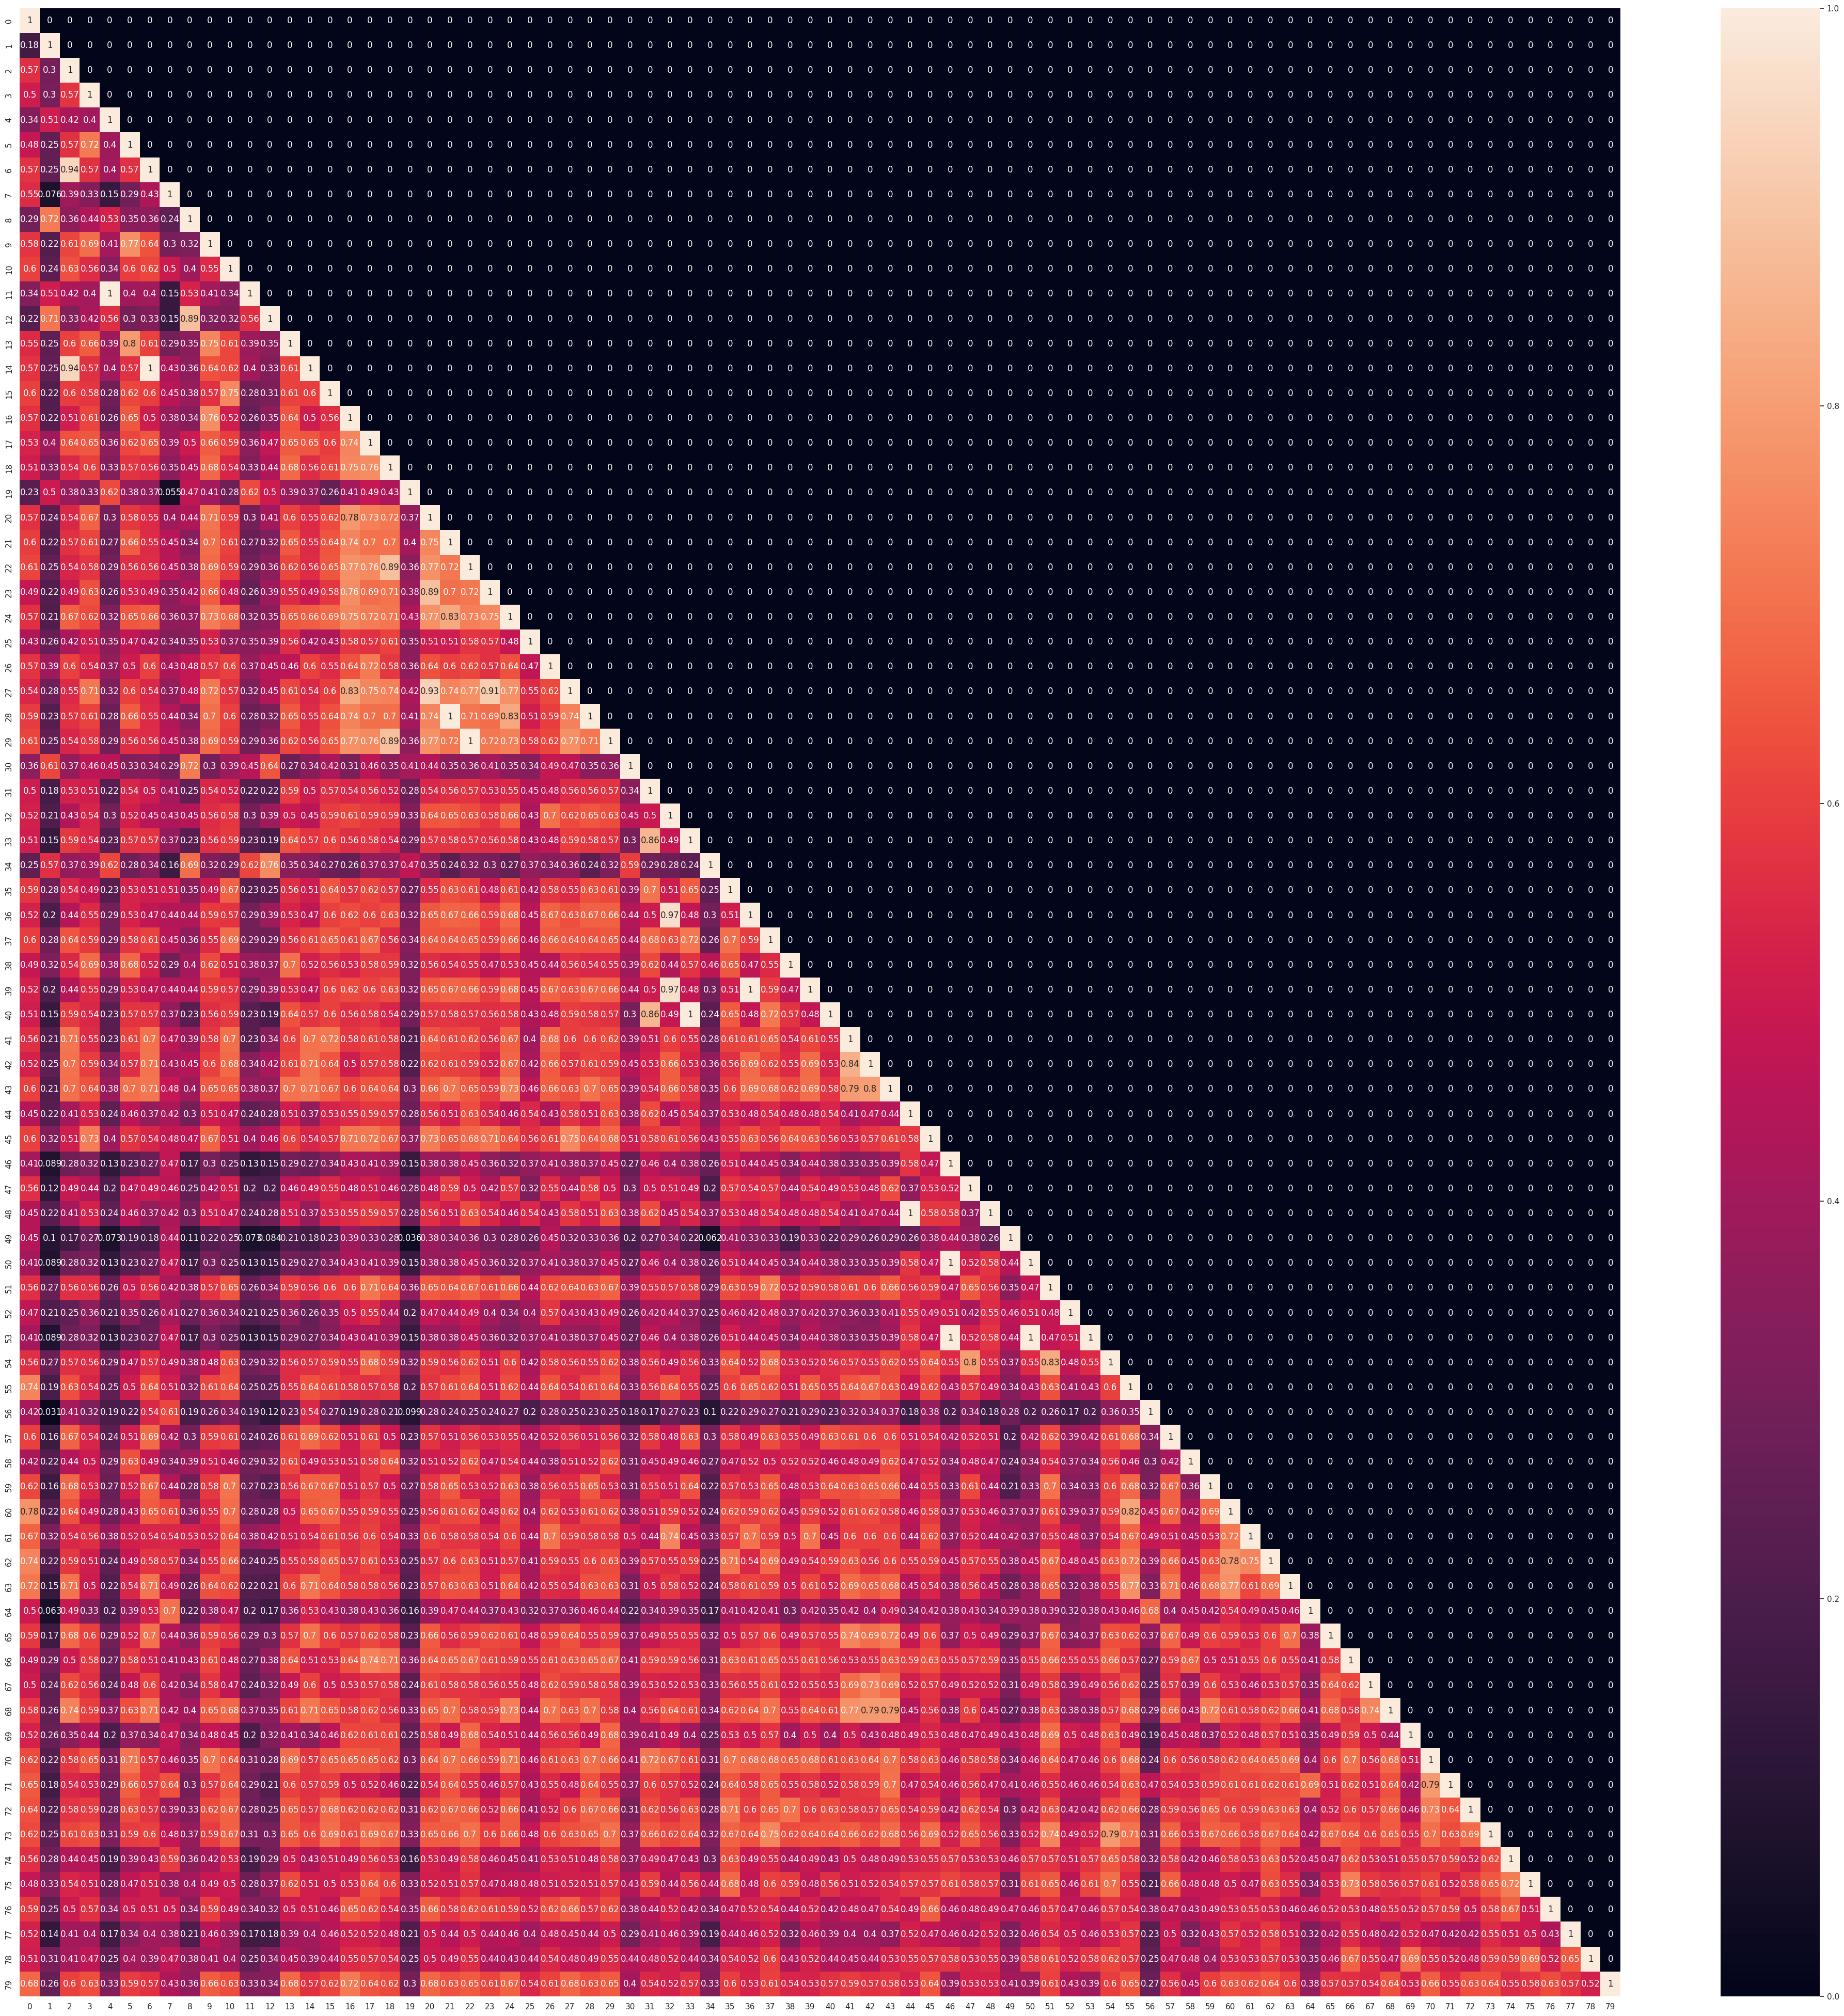

In [ ]:
sns.set(rc={'figure.figsize':(50, 50)})
sns.heatmap(sim, annot=True)

Presentation of the graph with the relationships between all classes

<ipython-input-20-dc336b4d568f>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral')
<ipython-input-20-dc336b4d568f>:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


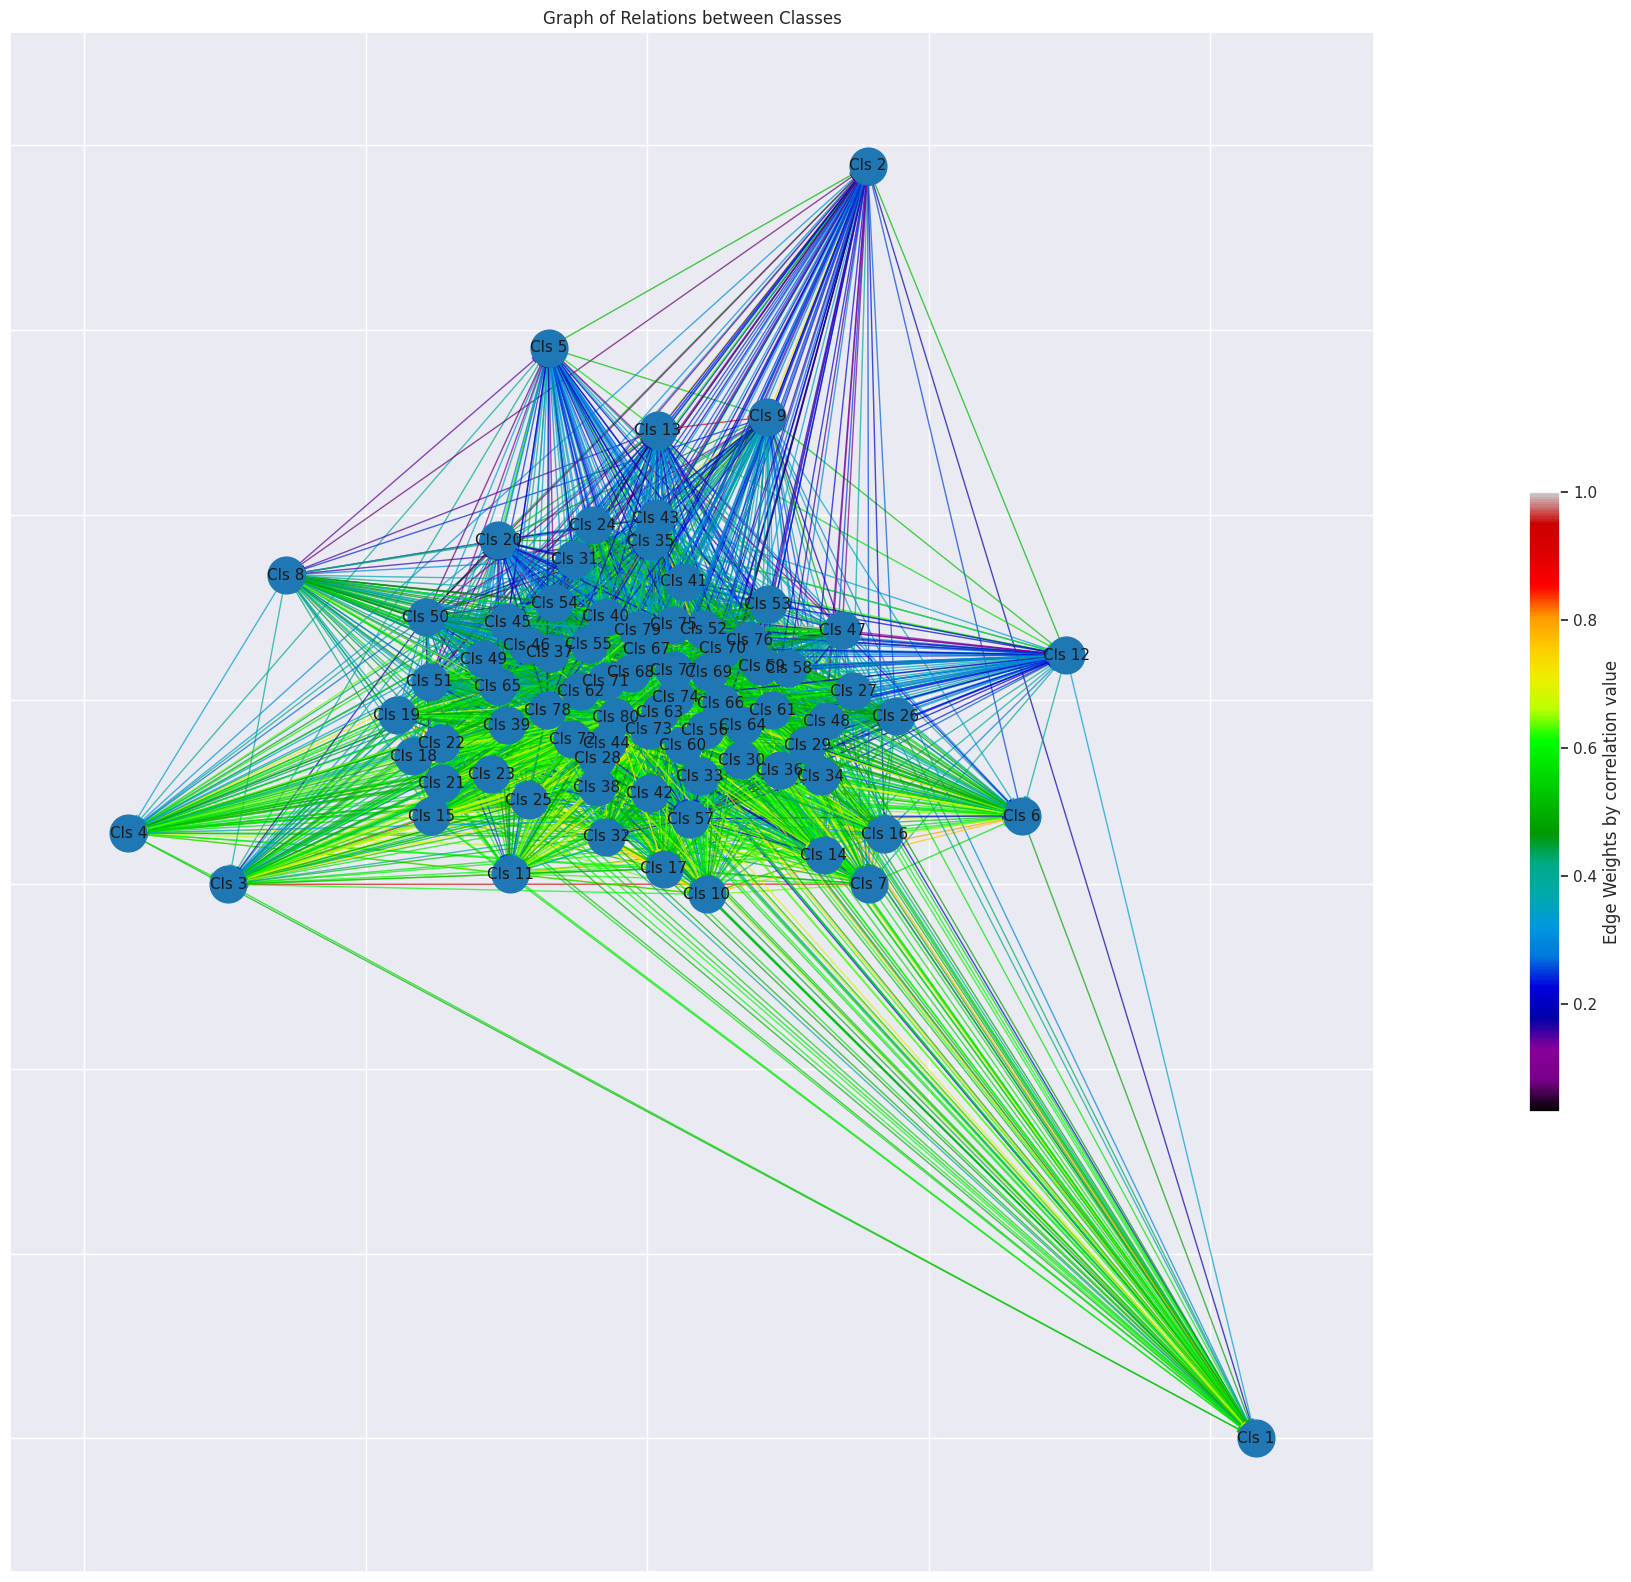

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Number of classes acording the correlation matrix
num_classes = len(sim)

#Graph creation
G = nx.DiGraph()

for i in range(num_classes):
    G.add_node(i + 1)

# Add weighted edges
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and sim[i, j] != 0 and sim[i, j] != 1:
            G.add_edge(i + 1, j + 1, weight=sim[i, j])

#  Graph Layout
pos = nx.spring_layout(G)

# weighted of edges
edge_weights = nx.get_edge_attributes(G, 'weight')

# Color palette
cmap = plt.cm.get_cmap('nipy_spectral')
norm = Normalize(vmin=min(edge_weights.values()), vmax=max(edge_weights.values()))
sm = ScalarMappable(cmap=cmap, norm=norm)


plt.figure(figsize=(20, 20))


nx.draw_networkx_nodes(G, pos, node_size=700)

# color edges
edge_colors = [cmap(norm(edge_weights[edge])) for edge in G.edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7)

# Node Rotules
labels = {i + 1: f'Cls {i + 1}' for i in range(num_classes)}
nx.draw_networkx_labels(G, pos, labels, font_size=11)


cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Edge Weights by correlation value')

# Graph show
plt.title('Graph of Relations between Classes')
plt.show()



Presentation of the graph with the relationships between classes with 0.6 score value or higher.

<ipython-input-21-ecc6ca04dedb>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral')
<ipython-input-21-ecc6ca04dedb>:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)


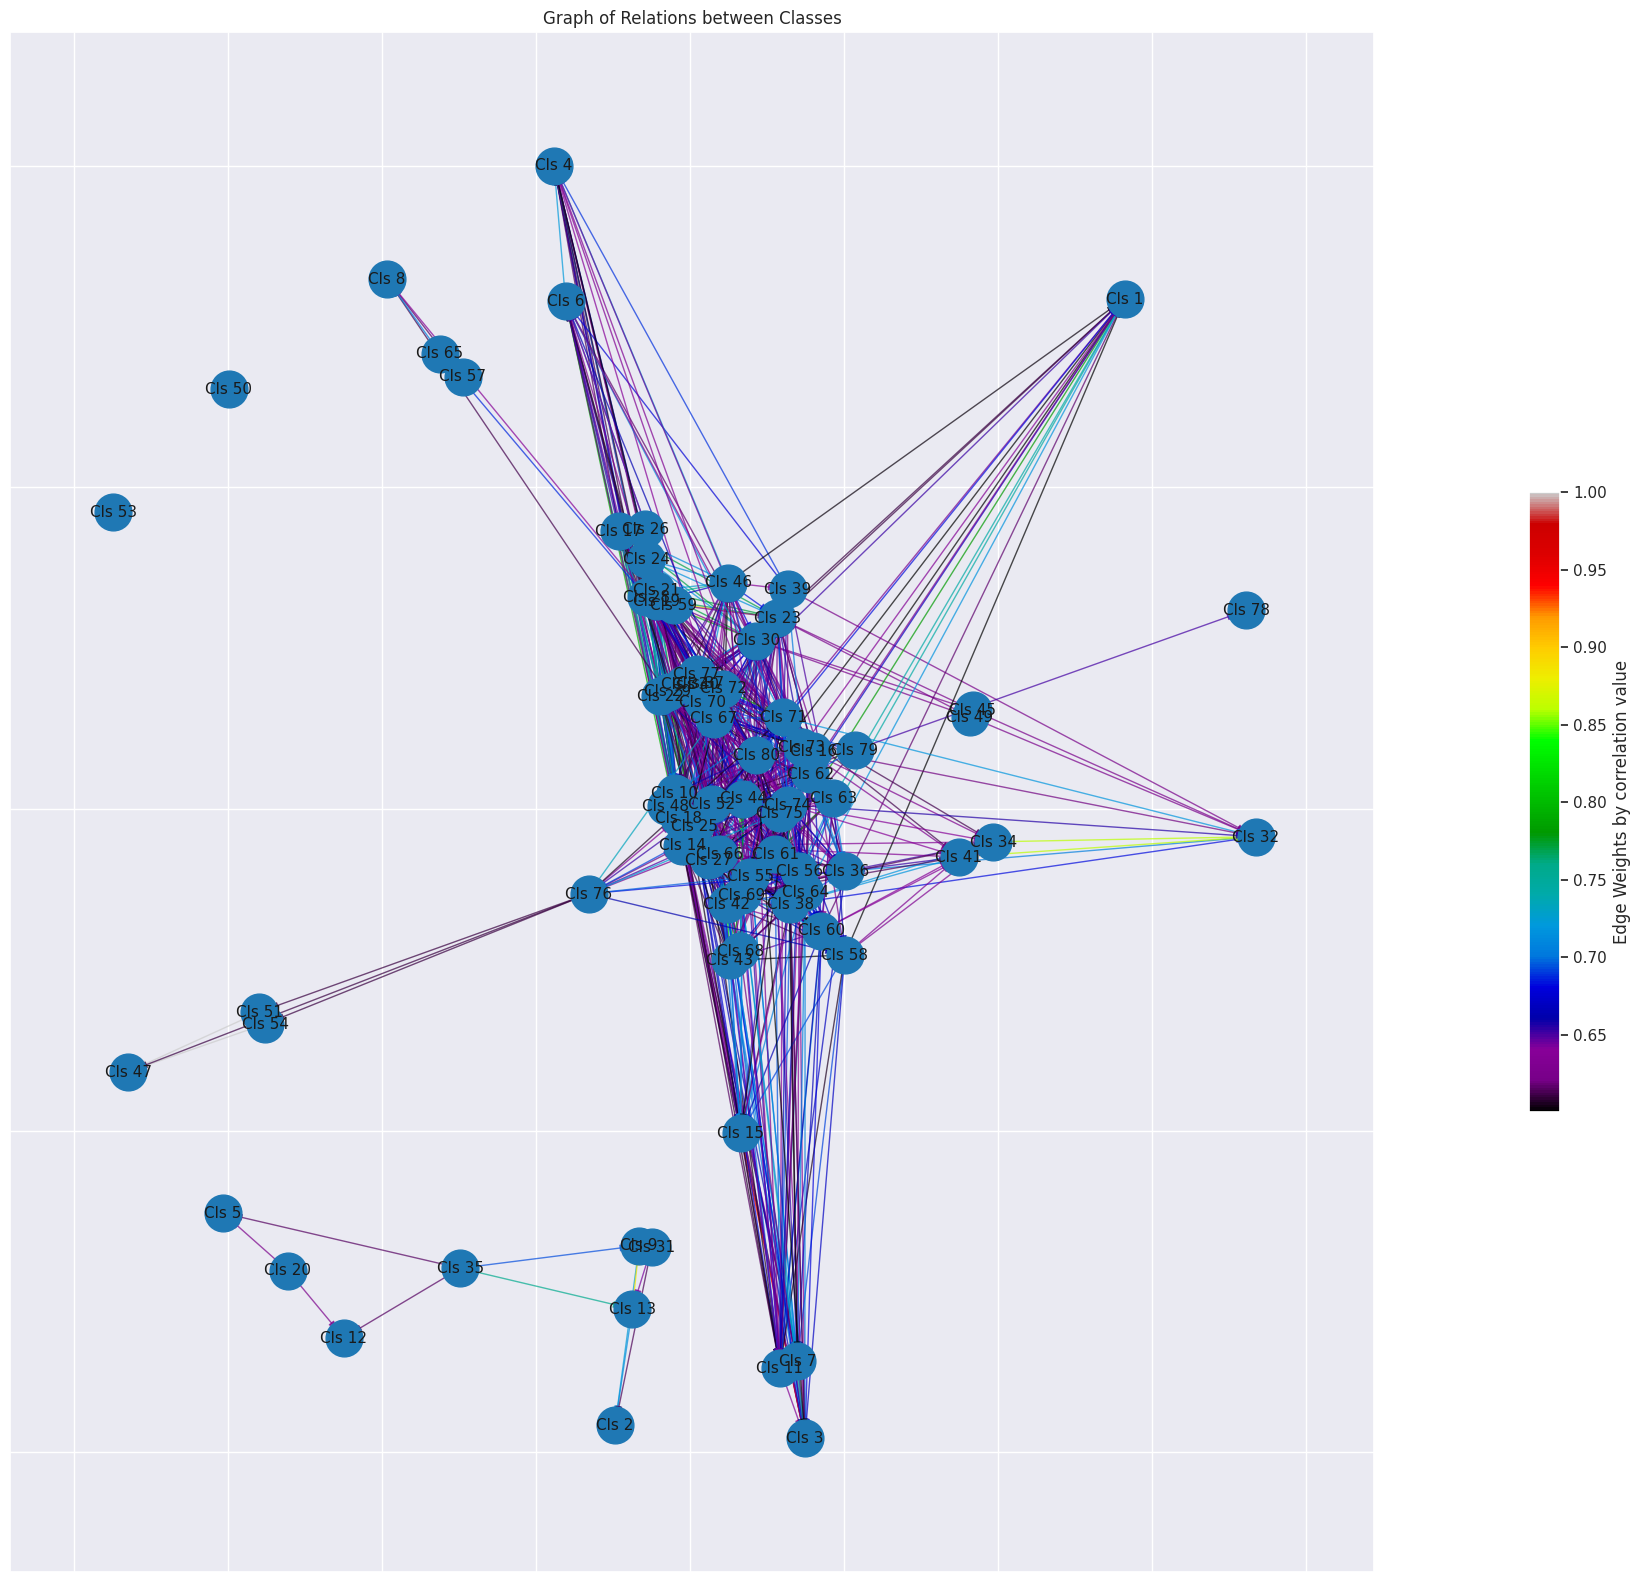

In [ ]:

# Number of classes acording the correlation matrix
num_classes = len(sim)

#Graph creation
G = nx.DiGraph()

for i in range(num_classes):
    G.add_node(i + 1)

# Add weighted edges
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and sim[i, j] != 0 and sim[i, j] != 1 and 0.6 <= sim[i, j]:
            G.add_edge(i + 1, j + 1, weight=sim[i, j])

#  Graph Layout
pos = nx.spring_layout(G)

# weighted of edges
edge_weights = nx.get_edge_attributes(G, 'weight')

# Color palette
cmap = plt.cm.get_cmap('nipy_spectral')
norm = Normalize(vmin=min(edge_weights.values()), vmax=max(edge_weights.values()))
sm = ScalarMappable(cmap=cmap, norm=norm)


plt.figure(figsize=(20, 20))


nx.draw_networkx_nodes(G, pos, node_size=700)

# color edges
edge_colors = [cmap(norm(edge_weights[edge])) for edge in G.edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7)

# Node Rotules
labels = {i + 1: f'Cls {i + 1}' for i in range(num_classes)}
nx.draw_networkx_labels(G, pos, labels, font_size=11)


cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Edge Weights by correlation value')

# Graph show
plt.title('Graph of Relations between Classes')
plt.show()